# EDA - Employee Attrition Data

In [2]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## To suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
## Importing the employee attrition dataset
df_emp=pd.read_csv(r"C:\Users\Shree\Desktop\Github\EDA\Employee_Attrition.csv")
df_emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
## Check dataframe dimensions
df_emp.shape

(1470, 35)

In [5]:
## Get a concise summary of a DataFrame.
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
## Generate descriptive statistics.
df_emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
## Generate descriptive statistics for categorical data.
df_emp.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
## Check for null values
df_emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
## Create numerical feature's dataframe
df_num=df_emp.select_dtypes(["int64","float64"])
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


## Checking skewness value for numerical column

In [10]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_num.columns:
    s=stats.skew(df_num[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [11]:
right_skewed

{'Age': 0.41,
 'DistanceFromHome': 0.96,
 'EmployeeNumber': 0.02,
 'JobLevel': 1.02,
 'MonthlyIncome': 1.37,
 'MonthlyRate': 0.02,
 'NumCompaniesWorked': 1.03,
 'PercentSalaryHike': 0.82,
 'PerformanceRating': 1.92,
 'StockOptionLevel': 0.97,
 'TotalWorkingYears': 1.12,
 'TrainingTimesLastYear': 0.55,
 'YearsAtCompany': 1.76,
 'YearsInCurrentRole': 0.92,
 'YearsSinceLastPromotion': 1.98,
 'YearsWithCurrManager': 0.83}

In [12]:
left_skewed

{'DailyRate': -0.0,
 'Education': -0.29,
 'EnvironmentSatisfaction': -0.32,
 'HourlyRate': -0.03,
 'JobInvolvement': -0.5,
 'JobSatisfaction': -0.33,
 'RelationshipSatisfaction': -0.3,
 'WorkLifeBalance': -0.55}

In [14]:
len(df_num.columns)

26

## Outlier Treatment

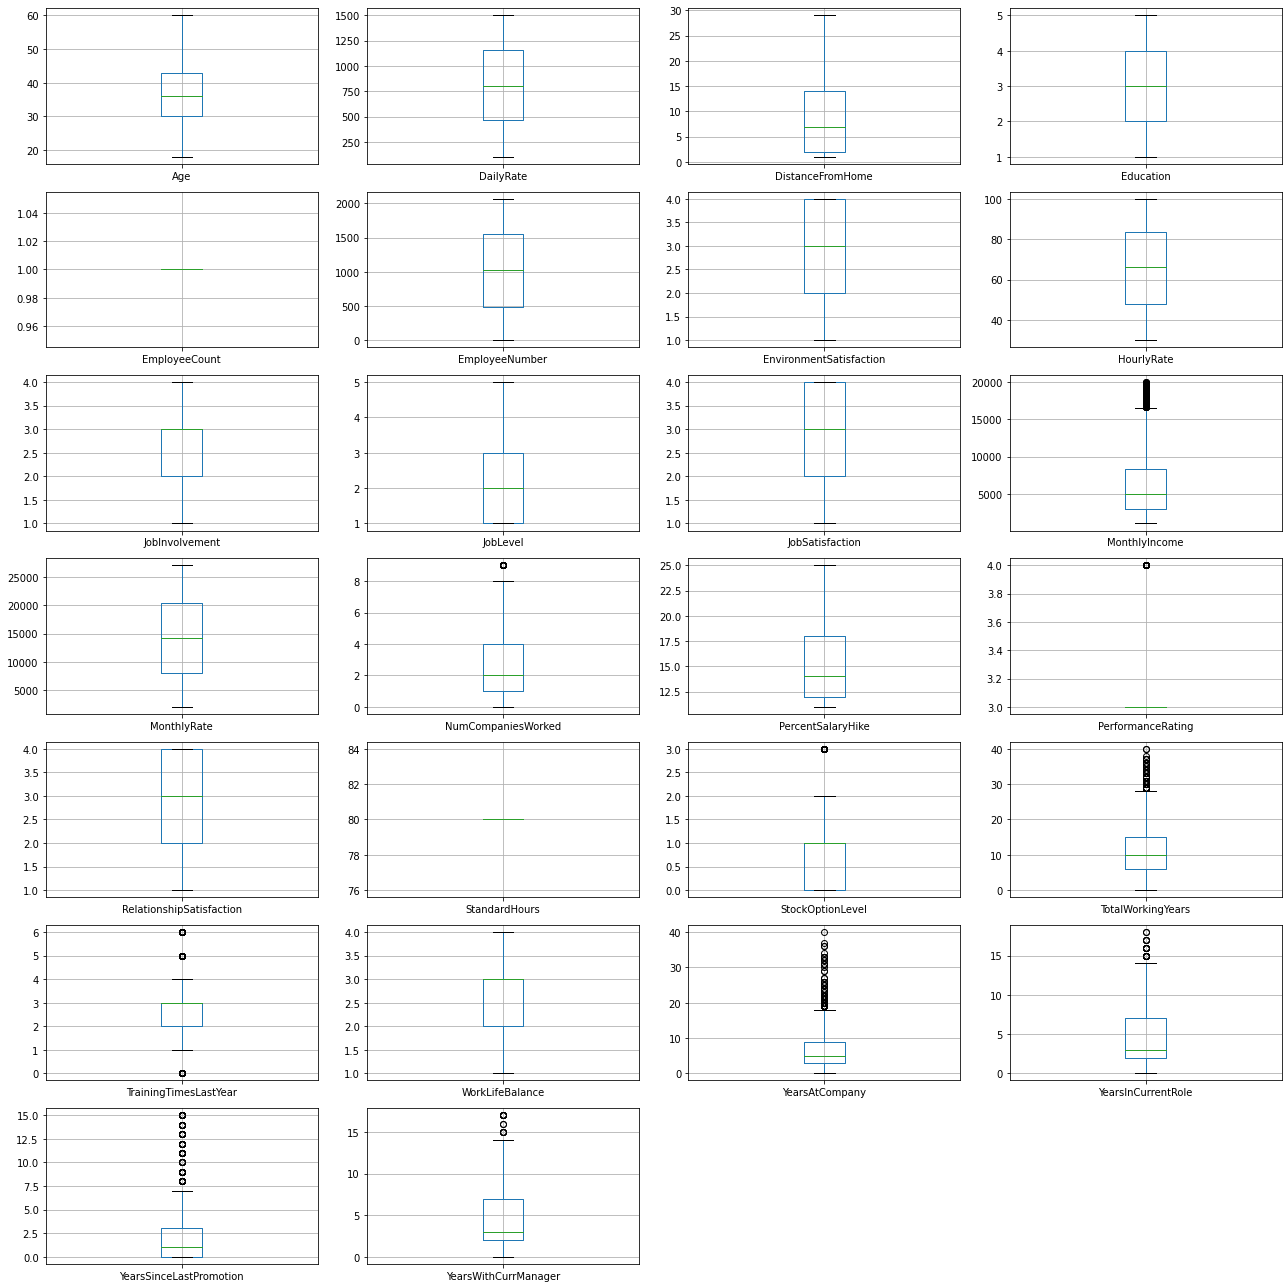

In [17]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(18,18))
for feature, i in zip(df_num.columns,range(1,27)):
    plt.subplot(7,4,i)
    df_num.boxplot(column=feature)
    plt.tight_layout() 

In [14]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Percentile Method

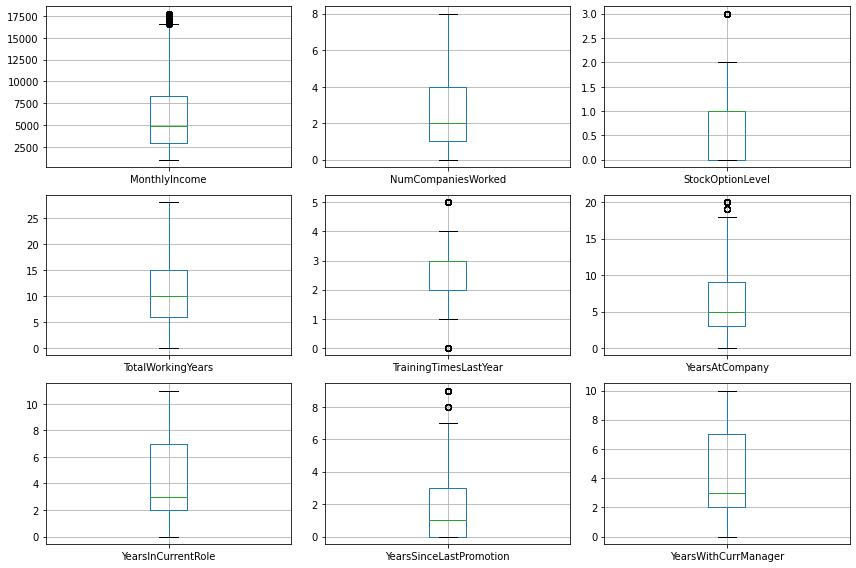

In [23]:
## Handling upper whisker outliers

upper=["MonthlyIncome","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

plt.figure(figsize=(12,8))
for feature,i in zip(upper,range(1,10)):
    p_95 = np.percentile(df_num[feature], 95)
    df_num.loc[df_num[feature] > p_95, feature] = p_95
    plt.subplot(3,3,i)
    df_num.boxplot(column=feature)
    plt.tight_layout()

### Checking outliers after using IQR/Percentile method.

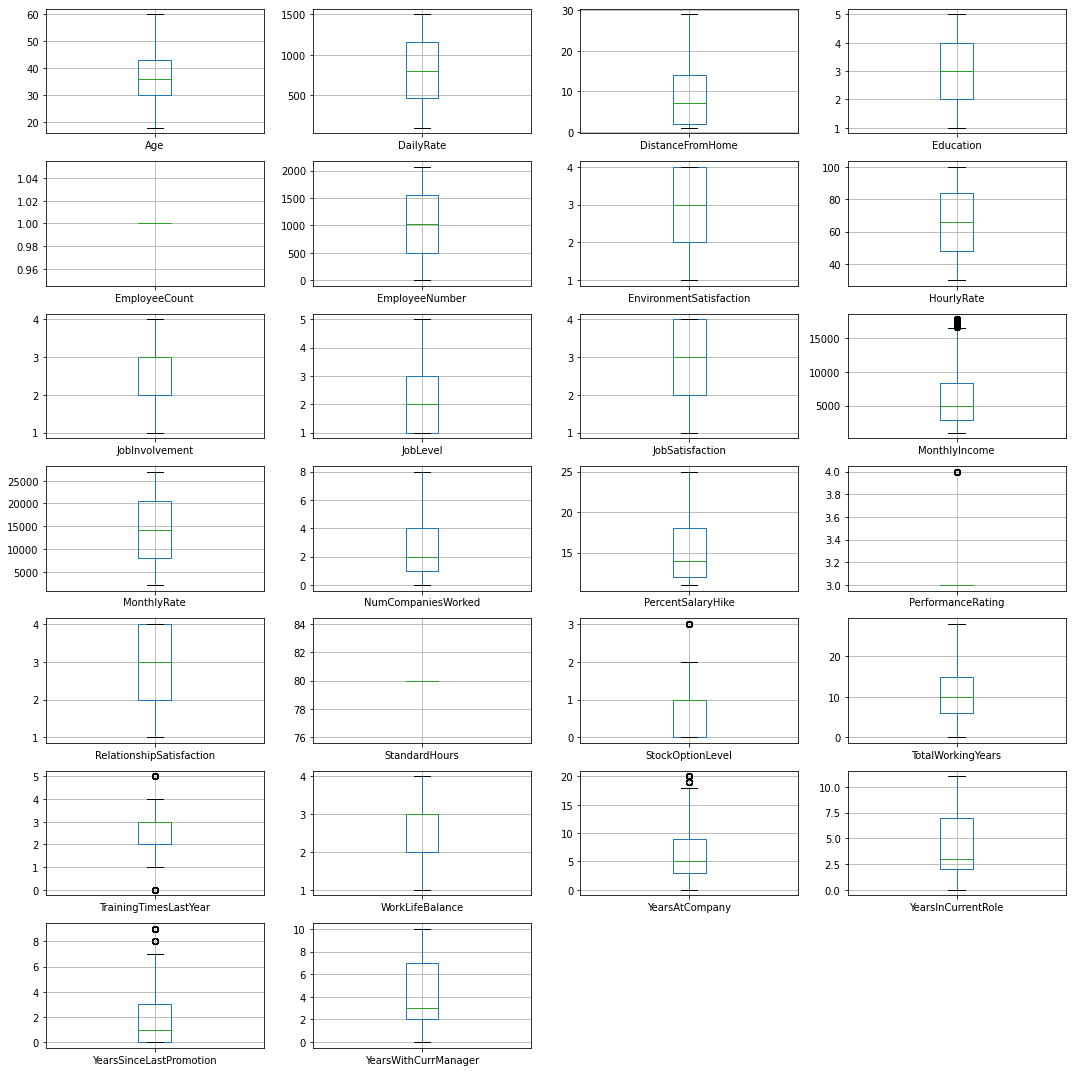

In [24]:
plt.figure(figsize=(15,15))
for feature, i in zip(df_num.columns,range(1,27)):
    plt.subplot(7,4,i)
    df_num.boxplot(column=feature)
    plt.tight_layout() 

## Multicollinearity

In [17]:
## Show the correlation between numericals features.
df_emp.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

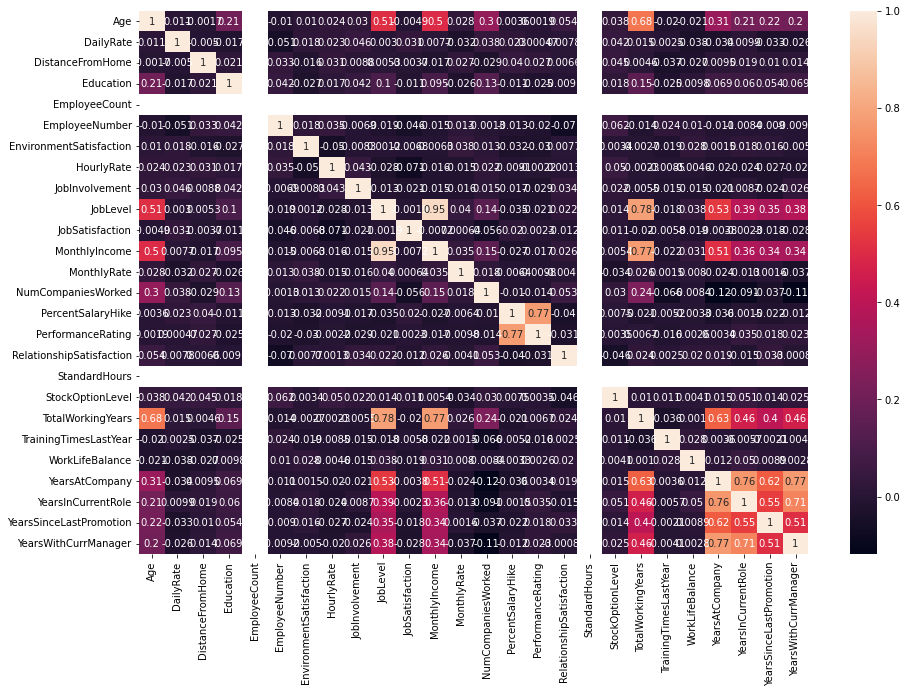

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df_emp.corr(),annot=True)

## variance_inflation_factor

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
df_num.shape[1] ## No of columns

26

In [22]:
df_num.values

array([[4.100e+01, 1.102e+03, 1.000e+00, ..., 4.000e+00, 0.000e+00,
        5.000e+00],
       [4.900e+01, 2.790e+02, 8.000e+00, ..., 7.000e+00, 1.000e+00,
        7.000e+00],
       [3.700e+01, 1.373e+03, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.700e+01, 1.550e+02, 4.000e+00, ..., 2.000e+00, 0.000e+00,
        3.000e+00],
       [4.900e+01, 1.023e+03, 2.000e+00, ..., 6.000e+00, 0.000e+00,
        8.000e+00],
       [3.400e+01, 6.280e+02, 8.000e+00, ..., 3.000e+00, 1.000e+00,
        2.000e+00]])

In [23]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

vif

,variables,VIF
0,Age,2.038882
1,DailyRate,1.020572
2,DistanceFromHome,1.015314
3,Education,1.061186
4,EmployeeCount,0.000000
5,EmployeeNumber,1.020261
6,EnvironmentSatisfaction,1.012764
7,HourlyRate,1.019435
8,JobInvolvement,1.014794
9,JobLevel,10.784751


## Checking ditsribution of each feature

In [24]:
len(df_num.columns)

26

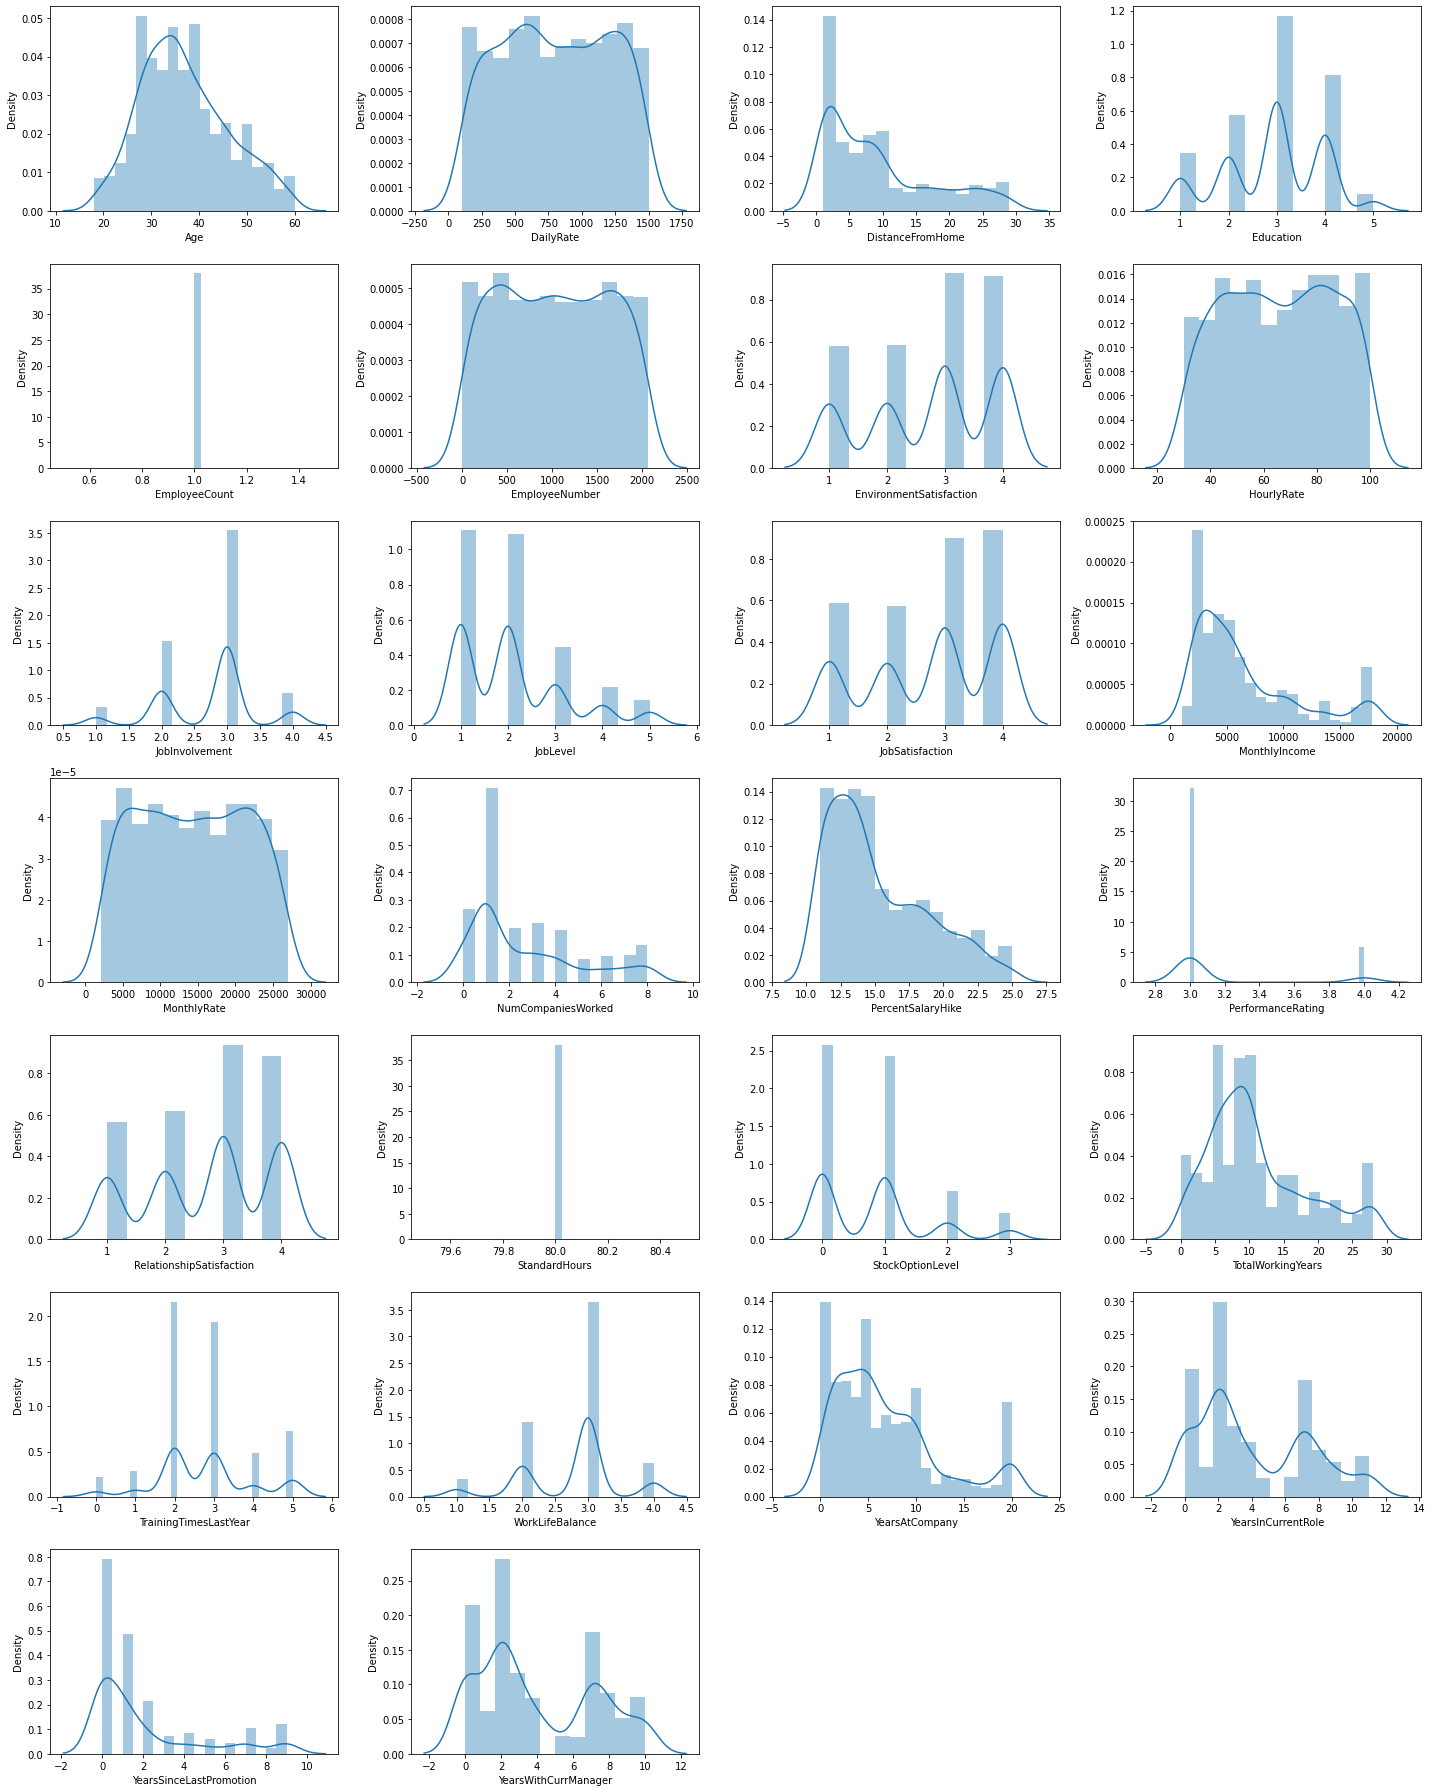

In [25]:
plt.figure(figsize=(20,25))
for feature,i in zip(df_num.columns,range(1,27)):
    plt.subplot(7,4,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

### Transformation of right skewed features

In [26]:
type(right_skewed)

dict

In [30]:
len(right_skewed.keys())

16

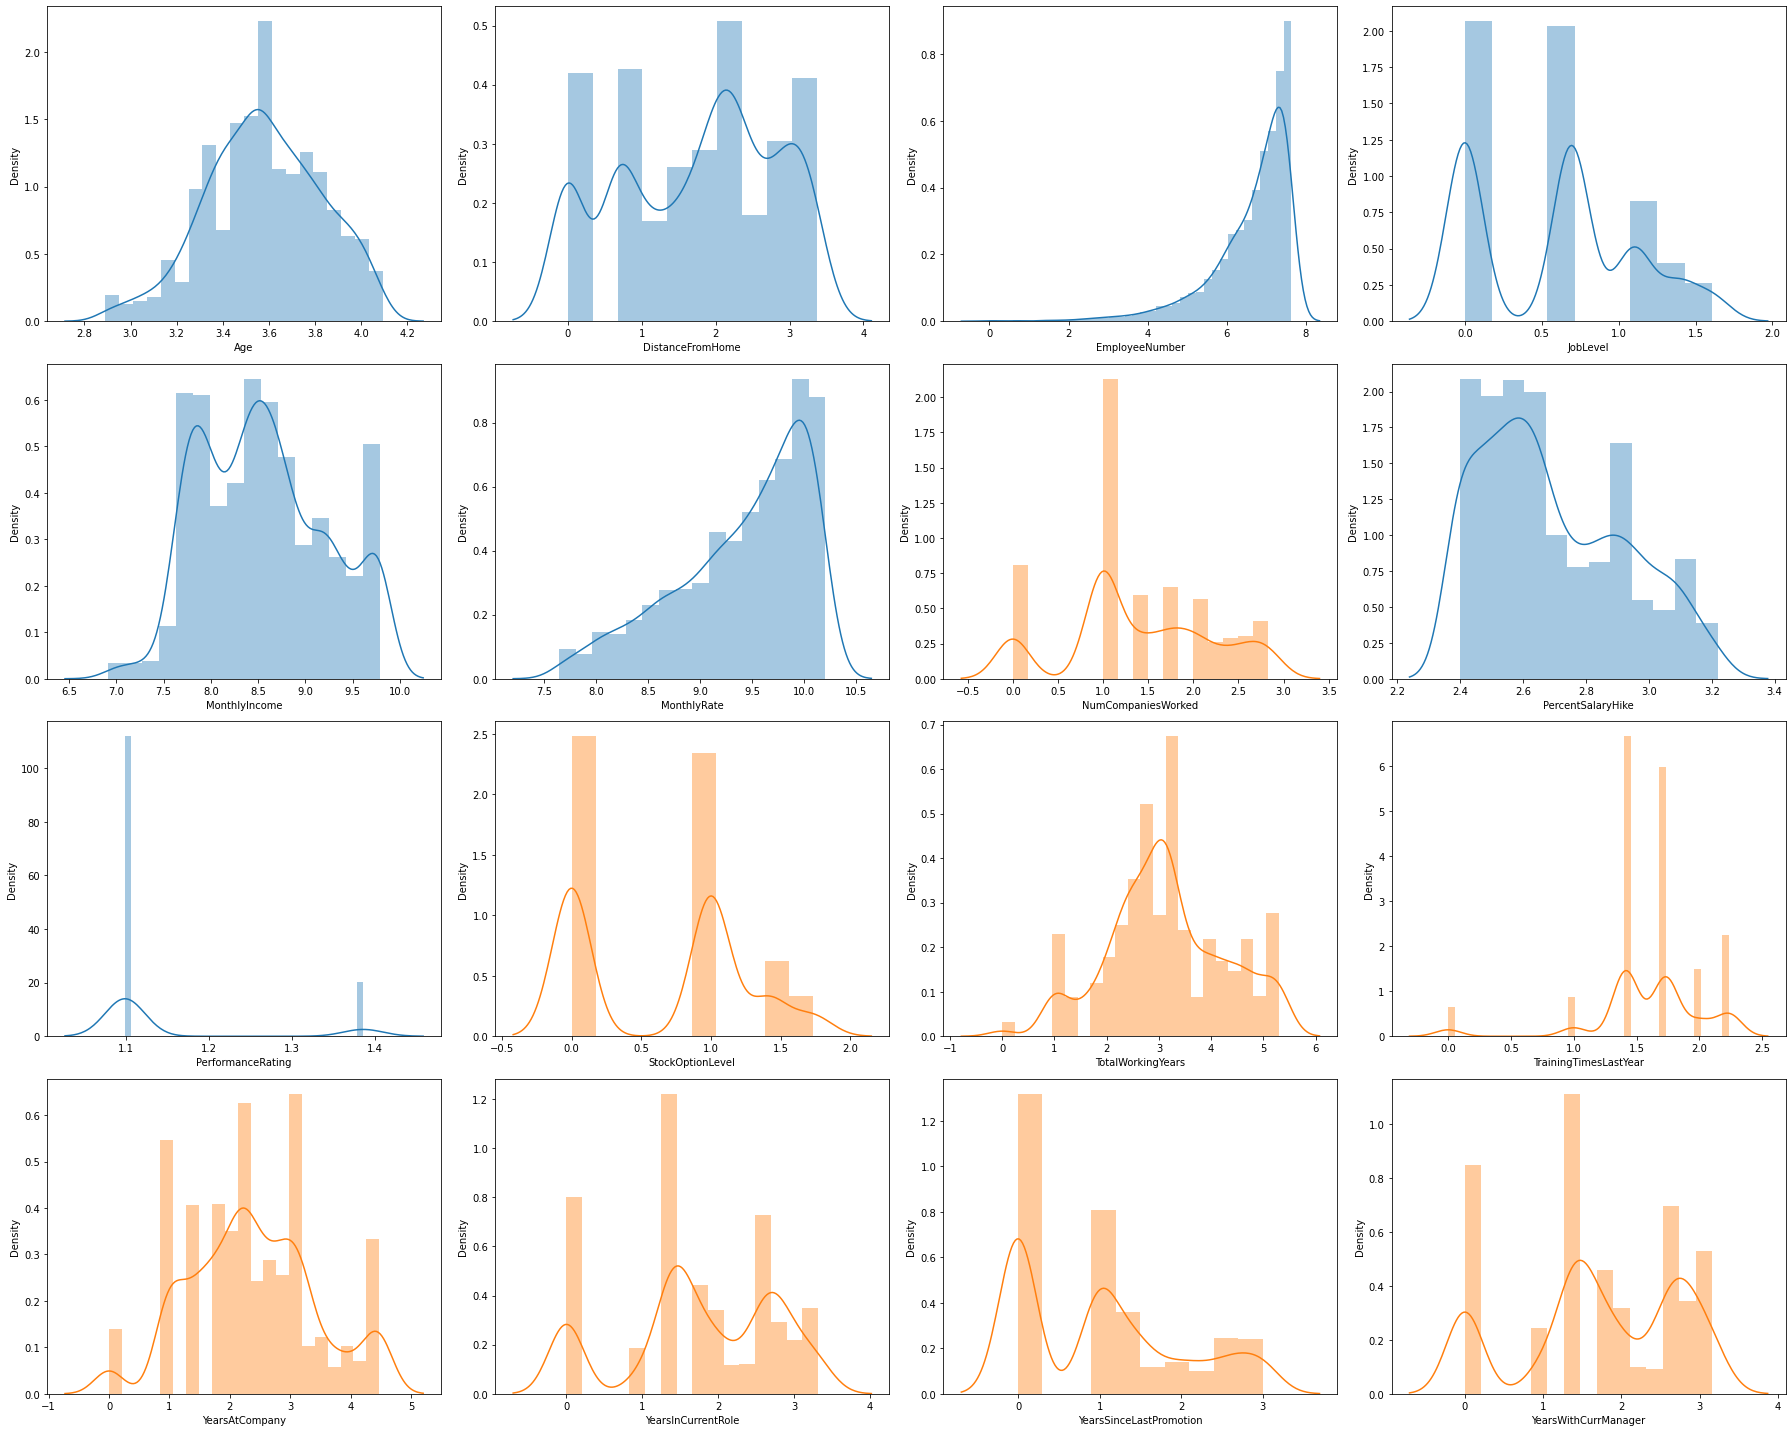

In [34]:
## Log-normal and sqrt transformation
plt.figure(figsize=(25,20))
for feature,i in zip(right_skewed.keys(),range(1,17)):
    plt.subplot(4,4,i)
    try:
        sns.distplot(np.log(df_num[feature]))
        plt.tight_layout()
    except:
        sns.distplot(np.sqrt(df_num[feature]))
        plt.tight_layout()

### Transformation of left skewed features

In [29]:
left_skewed.keys()

dict_keys(['DailyRate', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'])

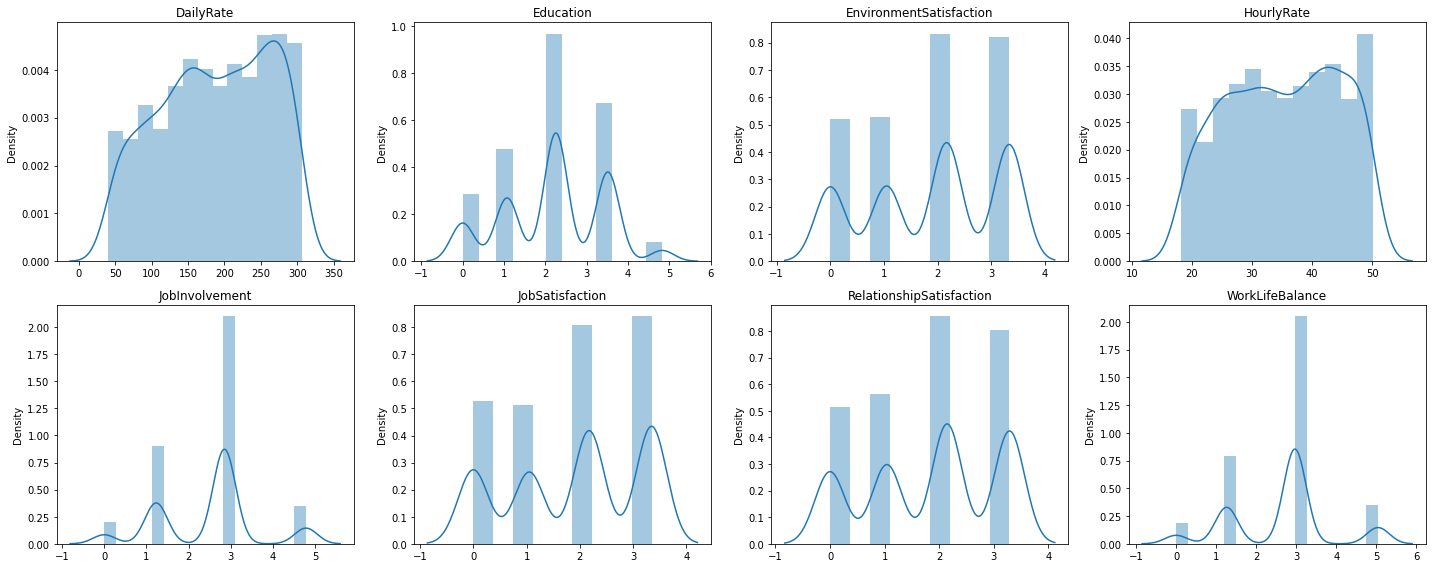

In [35]:
plt.figure(figsize=(20,8))
for feature,i in zip(left_skewed.keys(),range(1,9)):
    plt.subplot(2,4,i)
    sns.distplot(stats.boxcox(df_num[feature])[0])
    plt.title(feature)
    plt.tight_layout()

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Ordinal data
- Rating ----> good-1 better-2 best-3
- Label Encoding

2. Nominal data

- Gender(M/F), Marital status(M/UM/S)
- One hot encoding
 
### Types of Encoding
 1. Label Encoding
- Refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.


 2. One hot encoding
- Its a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. 
- This first requires that the categorical values be mapped to integer values, that is label encoding. 
- Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.


 3. Dummy variable trap
- It is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

In [31]:
df_cat=df_emp.select_dtypes("object")
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [32]:
df_cat["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [33]:
df_cat["Attrition"].replace({"Yes":1,"No":0},inplace=True)
df_cat["Attrition"].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [34]:
df_cat["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

### Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()  ## Creating object from LabelEncoder() class
encoder.fit_transform(df_cat["BusinessTravel"])

array([2, 1, 2, ..., 2, 1, 2])

### pd.get_dummies()

- Convert categorical variable into dummy/indicator variables.

In [37]:
df_dummies_business = pd.get_dummies(df_cat["BusinessTravel"], drop_first = True)
df_dummies_business.head()

,Travel_Frequently,Travel_Rarely
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [38]:
df_cat["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [39]:
df_dummies_depart = pd.get_dummies(df_cat["Department"], drop_first = True)
df_dummies_depart.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
df_cat["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [41]:
df_dummies_edu = pd.get_dummies(df_cat["EducationField"], drop_first = True)
df_dummies_edu.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [42]:
df_cat["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [43]:
df_dummies_gender = pd.get_dummies(df_cat["Gender"], drop_first = True)
df_dummies_gender.head()

,Male
0,0
1,1
2,1
3,0
4,1


In [44]:
df_cat["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [45]:
df_dummies_jobrole = pd.get_dummies(df_cat["JobRole"], drop_first = True)
df_dummies_jobrole.head()

,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [46]:
df_cat["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [47]:
df_dummies_marital = pd.get_dummies(df_cat["MaritalStatus"], drop_first = True)
df_dummies_marital.head()

,Married,Single
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [48]:
df_cat["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [49]:
## Only one value value no pattern its better to drop this coulmn
df_cat.drop("Over18",axis=1,inplace=True)

In [50]:
df_cat["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [51]:
df_dummies_overtime = pd.get_dummies(df_cat["OverTime"], drop_first = True)
df_dummies_overtime.head()

,Yes
0,1
1,0
2,1
3,1
4,0


In [52]:
## Combine all features into single dataframe.
final_df = pd.concat([df_num,df_dummies_business,df_dummies_depart,df_dummies_edu,df_dummies_gender,df_dummies_jobrole ,df_dummies_marital,df_dummies_overtime], axis= 1)  ## axis =1 bcoz we have to concatenate columnwise 

In [53]:
final_df["Attrition"]=df_cat["Attrition"]

In [54]:
final_df.shape

(1470, 48)

In [55]:
df_emp.shape

(1470, 35)

In [56]:
final_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,1,0,0,0,0,1,0,1,0
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,1,0,1,0,0,0


Observation:
- Now the above dataframe is ready so we can use it for applying any machine learning model to predict output.